In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
pizza_df = pd.read_csv("pizza_sales.csv")
pizza_df.head(5)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
pizza_df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [4]:
pizza_df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

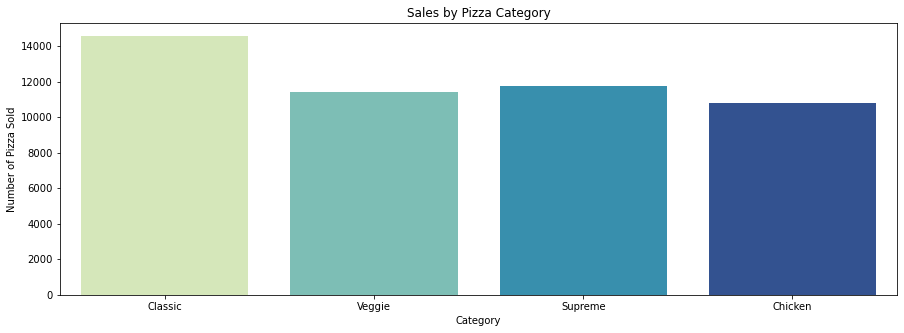

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(data=pizza_df, x="pizza_category", palette="YlGnBu")
plt.title("Sales by Pizza Category")
plt.xlabel("Category")
plt.ylabel("Number of Pizza Sold")
plt.show()

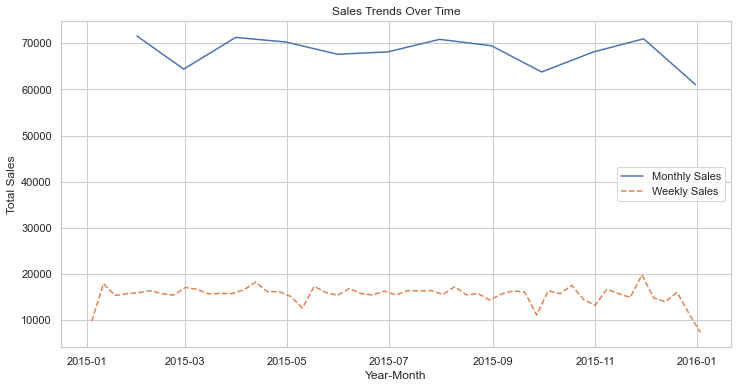

In [27]:
pizza_df['order_date'] = pd.to_datetime(pizza_df['order_date'])

monthly_sales = pizza_df.resample('M', on='order_date')['total_price'].sum()
weekly_sales = pizza_df.resample('W', on='order_date')['total_price'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.plot(weekly_sales, label='Weekly Sales', linestyle='--')
plt.title('Sales Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

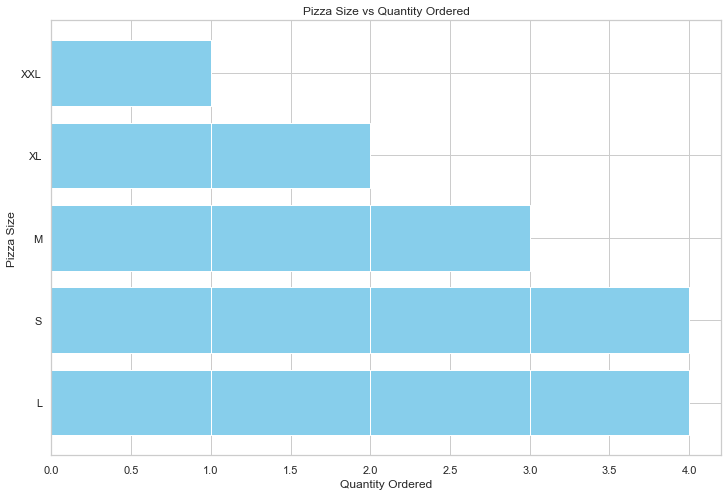

In [28]:
sorted_df = pizza_df.sort_values(by='quantity', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(sorted_df['pizza_size'], sorted_df['quantity'], color='skyblue')
plt.title('Pizza Size vs Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Pizza Size')
plt.show()

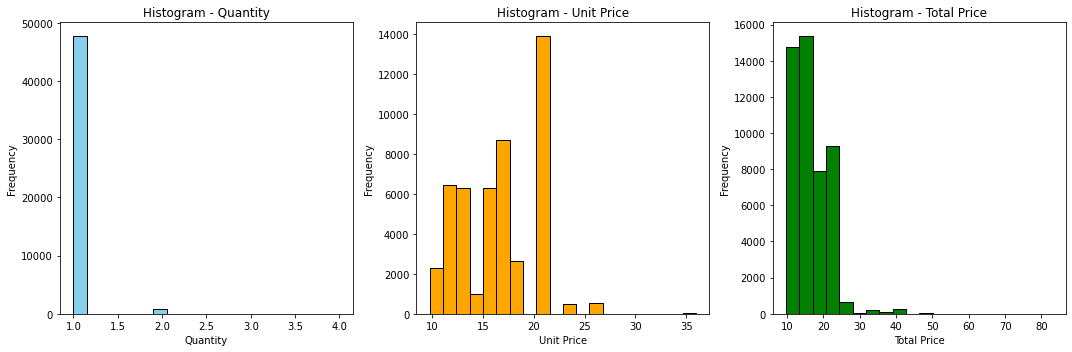

In [8]:
plt.figure(figsize=(15, 5))

# Plotting histogram for 'quantity'
plt.subplot(1, 3, 1)
plt.hist(pizza_df['quantity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram - Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Plotting histogram for 'unit_price'
plt.subplot(1, 3, 2)
plt.hist(pizza_df['unit_price'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram - Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

# Plotting histogram for 'total_price'
plt.subplot(1, 3, 3)
plt.hist(pizza_df['total_price'], bins=20, color='green', edgecolor='black')
plt.title('Histogram - Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

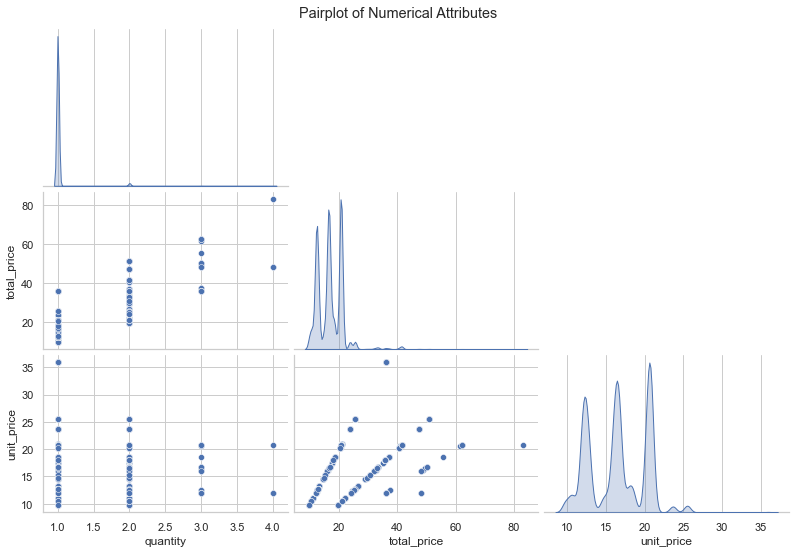

In [9]:
scatter_attributes = ['quantity', 'total_price', 'unit_price', 'pizza_size']

scatter_df = pizza_df[scatter_attributes]

# Create pairplot
sns.set(style="whitegrid")
sns.pairplot(scatter_df, height=2.5, aspect=1.5, diag_kind="kde", corner=True)
plt.suptitle('Pairplot of Numerical Attributes', y=1.02)
plt.show()

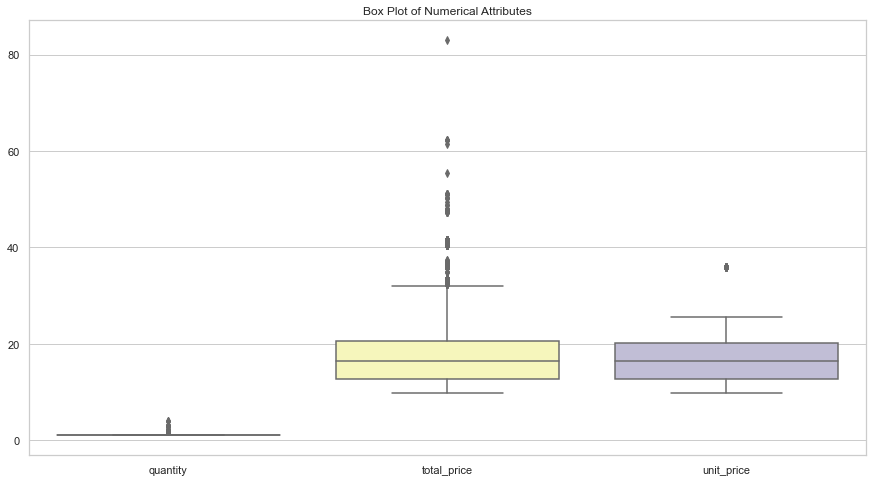

In [26]:
boxplot_attributes = ['quantity', 'total_price', 'unit_price']

boxplot_df = pizza_df[boxplot_attributes]

# Create a box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=boxplot_df, palette='Set3')
plt.title('Box Plot of Numerical Attributes')
plt.show()

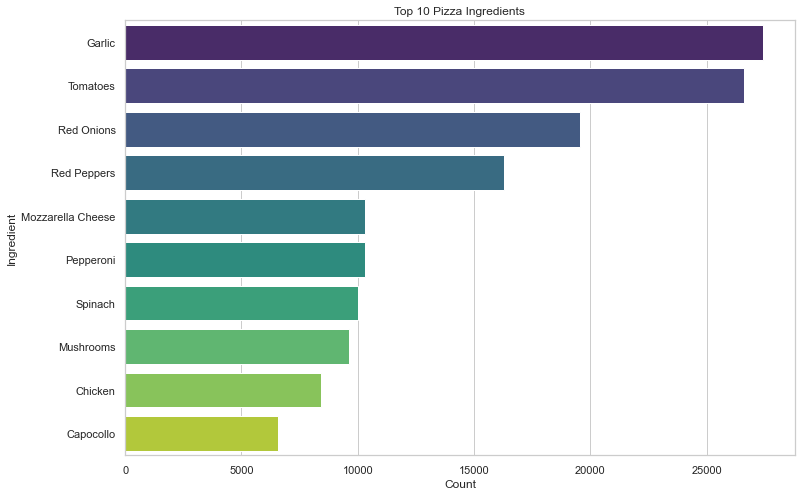

In [11]:
pizza_df['pizza_ingredients'] = pizza_df['pizza_ingredients'].str.split(',')

all_ingredients = [ingredient.strip() for sublist in pizza_df['pizza_ingredients'].dropna() for ingredient in sublist]

# Count the occurrences of each ingredient
ingredient_counts = pd.Series(all_ingredients).value_counts().reset_index()
ingredient_counts.columns = ['Ingredient', 'Count']

# Choose the top N ingredients to visualize
top_n = 10
top_ingredients = ingredient_counts.head(top_n)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Ingredient', data=top_ingredients, palette='viridis')
plt.title(f'Top {top_n} Pizza Ingredients')
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.show()

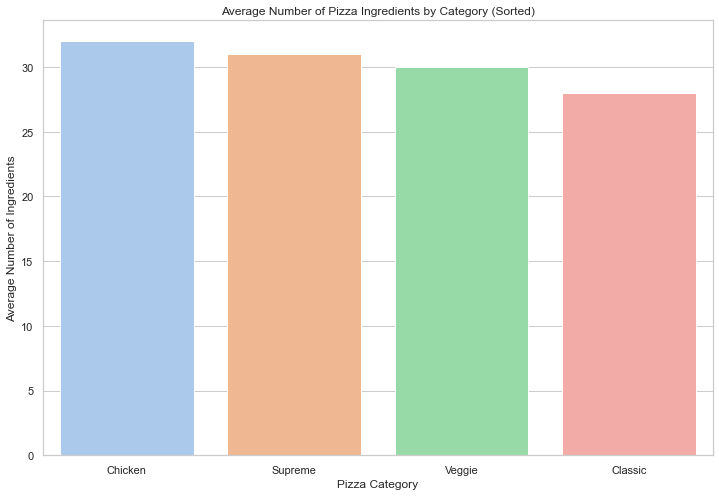

In [12]:
average_ingredients = pizza_df.groupby('pizza_category')['pizza_ingredients'].apply(lambda x: len(str(x).split(','))).reset_index()

# Sort by average number of ingredients
sorted_data = average_ingredients.sort_values(by='pizza_ingredients', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='pizza_category', y='pizza_ingredients', data=sorted_data, palette='pastel')
plt.title('Average Number of Pizza Ingredients by Category (Sorted)')
plt.xlabel('Pizza Category')
plt.ylabel('Average Number of Ingredients')
plt.show()

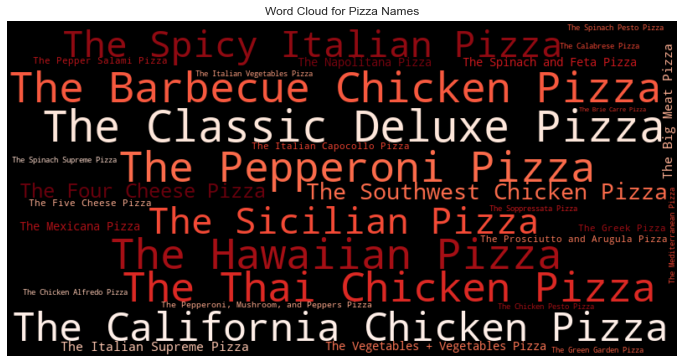

In [17]:
from wordcloud import WordCloud

pizza_name_counts = pizza_df['pizza_name'].value_counts().to_dict()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate_from_frequencies(pizza_name_counts)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Pizza Names')
plt.show()